In [419]:
import numpy as np
import pandas as pd

In [420]:
all_matches = pd.read_csv(r'/home/chetan/Downloads/ipl_male_csv2/all_matches.csv')

/home/chetan/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [421]:
all_matches.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
198725,1254078,2021,2021-04-26,"Narendra Modi Stadium, Ahmedabad",2,15.6,Kolkata Knight Riders,Punjab Kings,EJG Morgan,KD Karthik,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198726,1254078,2021,2021-04-26,"Narendra Modi Stadium, Ahmedabad",2,16.1,Kolkata Knight Riders,Punjab Kings,EJG Morgan,KD Karthik,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198727,1254078,2021,2021-04-26,"Narendra Modi Stadium, Ahmedabad",2,16.2,Kolkata Knight Riders,Punjab Kings,KD Karthik,EJG Morgan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198728,1254078,2021,2021-04-26,"Narendra Modi Stadium, Ahmedabad",2,16.3,Kolkata Knight Riders,Punjab Kings,KD Karthik,EJG Morgan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198729,1254078,2021,2021-04-26,"Narendra Modi Stadium, Ahmedabad",2,16.4,Kolkata Knight Riders,Punjab Kings,KD Karthik,EJG Morgan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Making Some Minor Changes and removing redundancies

In [422]:
all_matches_corrected = all_matches.replace(to_replace='Kings XI Punjab',value='Punjab Kings')
all_matches_corrected.replace(to_replace='Feroz Shah Kotla',value='Arun Jaitley Stadium',inplace=True)
all_matches_corrected.replace(to_replace='Sardar Patel Stadium, Motera',value='Narendra Modi Stadium',inplace=True)
all_matches_corrected.replace(to_replace='Wankhede Stadium, Mumbai',value='Wankhede Stadium',inplace=True)
all_matches_corrected.replace(to_replace=['MA Chidambaram Stadium, Chepauk','MA Chidambaram Stadium, Chepauk, Chennai']
                              ,value='MA Chidambaram Stadium',inplace=True)
all_matches_corrected.replace(to_replace='M.Chinnaswamy Stadium',value='M Chinnaswamy Stadium',inplace=True)

all_matches_corrected.replace(to_replace='Brabourne Stadium, Mumbai',value='Brabourne Stadium',inplace=True)
all_matches_corrected.replace(to_replace=['Punjab Cricket Association IS Bindra Stadium, Mohali'
                                                        ,'Punjab Cricket Association IS Bindra Stadium']
                                                        ,value='Punjab Cricket Association Stadium, Mohali',inplace=True)

all_matches_corrected.replace(to_replace='Rajiv Gandhi International Stadium, Uppal',value='Rajiv Gandhi International Stadium',inplace=True)
all_matches_corrected.replace(to_replace='Narendra Modi Stadium, Ahmedabad',value='Narendra Modi Stadium',inplace=True)
all_matches_corrected.replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants',inplace=True)

all_matches_corrected.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
198725,1254078,2021,2021-04-26,Narendra Modi Stadium,2,15.6,Kolkata Knight Riders,Punjab Kings,EJG Morgan,KD Karthik,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198726,1254078,2021,2021-04-26,Narendra Modi Stadium,2,16.1,Kolkata Knight Riders,Punjab Kings,EJG Morgan,KD Karthik,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198727,1254078,2021,2021-04-26,Narendra Modi Stadium,2,16.2,Kolkata Knight Riders,Punjab Kings,KD Karthik,EJG Morgan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198728,1254078,2021,2021-04-26,Narendra Modi Stadium,2,16.3,Kolkata Knight Riders,Punjab Kings,KD Karthik,EJG Morgan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198729,1254078,2021,2021-04-26,Narendra Modi Stadium,2,16.4,Kolkata Knight Riders,Punjab Kings,KD Karthik,EJG Morgan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [475]:
all_matches = all_matches_corrected.copy() #just using the same name again for subsequent code

#matches for season 2017
all_matches = all_matches[all_matches.season.isin([2017,'2018',2018,2019,'2019','2021/21','2021',2021])]

# Preparing the Statistics of Batsmen and Bowlers from Past Data

In [476]:
def get_batsmen_statistics(matches_df):

    batsmen_df = pd.DataFrame(columns = ['Batsman','Runs','Balls_Faced','Fours','Sixes','Strike_Rate'])
    strikers = matches_df.striker.unique()
    for striker in strikers:    
        batsman_ball2ball = matches_df[matches_df.striker==striker].runs_off_bat
        runs = batsman_ball2ball.sum()
        fours = int(batsman_ball2ball[batsman_ball2ball==4].count())
        sixes = int(batsman_ball2ball[batsman_ball2ball==6].count())
        balls = int(batsman_ball2ball.shape[0])
        strike_rate = round(runs/balls*100,2)
        batsmen_df=batsmen_df.append({'Batsman':striker,
                                      'Runs':runs,
                                      'Balls_Faced':balls,
                                      'Fours':fours,
                                      'Sixes':sixes,
                                      'Strike_Rate':strike_rate},ignore_index=True)
    
    return batsmen_df

def get_bowlers_statistics(matches_df):
    
    matches_df = matches_df.iloc[:]
    matches_df.fillna(0,inplace=True)
    bowlers_df = pd.DataFrame(columns = ['Bowler','Runs_Conceded','Balls','Economy_Rate'])
    bowlers = matches_df.bowler.unique()
    matches_df['total_runs'] = matches_df['runs_off_bat']+matches_df['wides']+matches_df['noballs']
    
    for bowler in bowlers:
        bowler_ball2ball = matches_df[matches_df.bowler==bowler]
        runs_conceded = bowler_ball2ball.total_runs.sum()

        #calculates the total number of wide balls and noballs
        wide_balls = bowler_ball2ball[bowler_ball2ball.wides !=0].shape[0]
        noballs = bowler_ball2ball[bowler_ball2ball.noballs !=0].shape[0]
        extra_balls = wide_balls+noballs
        
        #calculates the total number of overs
        balls = bowler_ball2ball.shape[0]
        overs = (balls-extra_balls)/6
        
        #economy rate
        economy_rate = round(runs_conceded/overs,2)
        
        bowlers_df = bowlers_df.append({'Bowler':bowler,'Economy_Rate':economy_rate,
                                        'Runs_Conceded':runs_conceded,'Balls':balls-extra_balls},ignore_index = True)
        
    return bowlers_df

In [478]:
all_matches.fillna(0,inplace=True)

#PP stands for Powerplay
all_matches_PP = all_matches[all_matches.ball<5.99]

In [479]:
batsmen_database_PP = get_batsmen_statistics(all_matches_PP)
batsmen_database_PP

,Batsman,Runs,Balls_Faced,Fours,Sixes,Strike_Rate
0,DA Warner,702,530,83,20,132.45
1,S Dhawan,939,725,122,24,129.52
2,MC Henriques,63,48,8,0,131.25
3,CH Gayle,620,494,74,33,125.51
4,Mandeep Singh,106,87,18,2,121.84
...,...,...,...,...,...,...
116,Shahbaz Ahmed,14,9,0,1,155.56
117,S Dube,12,16,1,1,75.00
118,M Shahrukh Khan,0,2,0,0,0.00
119,YBK Jaiswal,22,17,5,0,129.41


In [480]:
bowlers_database_PP = get_bowlers_statistics(all_matches_PP)
bowlers_database_PP

,Bowler,Runs_Conceded,Balls,Economy_Rate
0,TS Mills,56.0,42,8.00
1,A Choudhary,46.0,36,7.67
2,YS Chahal,303.0,248,7.33
3,S Aravind,141.0,90,9.40
4,SR Watson,161.0,96,10.06
...,...,...,...,...
149,Abhishek Sharma,22.0,18,7.33
150,LI Meriwala,28.0,12,14.00
151,Jalaj S Saxena,10.0,6,10.00
152,FA Allen,11.0,6,11.00


In [14]:
#Running the followling lines of code with save the statistics as csv files

#batsmen_database_PP.to_csv('batsmen_database_PP.csv')
#bowlers_database_PP.to_csv('bowlers_database_PP.csv')

# Data Preprocessing

In [481]:
data_df = all_matches.copy()

#filling nan with 0
data_df.fillna(0,inplace=True)

#considering only the powerplay
data_df = data_df[data_df.ball<5.99]

#eliminating super overs
data_df = data_df[data_df.innings<=2] 

#dropping useless columns
data_df.drop(['non_striker','wides','noballs','byes','legbyes',
              'penalty','other_wicket_type','other_player_dismissed'],axis=1,inplace=True)

#adding total runs column
data_df['total_runs']= data_df['runs_off_bat']+data_df['extras']



In [482]:
data_df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,bowler,runs_off_bat,extras,wicket_type,player_dismissed,total_runs
136598,1082591,2017,2017-04-05,Rajiv Gandhi International Stadium,1,0.1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,0,0,0,0,0
136599,1082591,2017,2017-04-05,Rajiv Gandhi International Stadium,1,0.2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,0,0,0,0,0
136600,1082591,2017,2017-04-05,Rajiv Gandhi International Stadium,1,0.3,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,4,0,0,0,4
136601,1082591,2017,2017-04-05,Rajiv Gandhi International Stadium,1,0.4,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,0,0,0,0,0
136602,1082591,2017,2017-04-05,Rajiv Gandhi International Stadium,1,0.5,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,TS Mills,0,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198661,1254078,2021,2021-04-26,Narendra Modi Stadium,2,5.2,Kolkata Knight Riders,Punjab Kings,EJG Morgan,Mohammed Shami,0,0,0,0,0
198662,1254078,2021,2021-04-26,Narendra Modi Stadium,2,5.3,Kolkata Knight Riders,Punjab Kings,EJG Morgan,Mohammed Shami,1,0,0,0,1
198663,1254078,2021,2021-04-26,Narendra Modi Stadium,2,5.4,Kolkata Knight Riders,Punjab Kings,RA Tripathi,Mohammed Shami,0,0,0,0,0
198664,1254078,2021,2021-04-26,Narendra Modi Stadium,2,5.5,Kolkata Knight Riders,Punjab Kings,RA Tripathi,Mohammed Shami,0,0,0,0,0


In [483]:
data_df_processed = pd.DataFrame(columns = ['match_id','season','venue','date','D/N','innings','batting_team','bowling_team','batsmen','bowlers',
                                   'avg_strike_rate','avg_economy_rate','wickets','runs'])

In [484]:
data_df_processed

,match_id,season,venue,date,D/N,innings,batting_team,bowling_team,batsmen,bowlers,avg_strike_rate,avg_economy_rate,wickets,runs


In [485]:
#returns the avg economy rate of the list of bowlers passed as an argument

def get_avg_economy_rate(bowlers):
    
    if len(bowlers)==0:
        return 7.0
    
    economy_t = 0
    for bowler in bowlers:
        if bowler in bowlers_database_PP.Bowler.values:
            index_of_bowler = bowlers_database_PP[bowlers_database_PP.Bowler==bowler].index.values
            economy = float(bowlers_database_PP.Economy_Rate.iloc[index_of_bowler])
        else:
            economy = 7.0
           
        economy_t += economy
    return round(economy_t/len(bowlers),2)

#***************************************************
#function returns the average strike rate of the list of batsmen passed as an argument

def get_avg_strike_rate(batsmen):
    
    if len(batsmen)==0:
        return 100
    strike_rate_t=0  #stores the total strike rate
    for batsman in batsmen:
        if batsman in batsmen_database_PP.Batsman.values:
            index_of_batsman = batsmen_database_PP[batsmen_database_PP.Batsman==batsman].index.values
            strike_rate = float(batsmen_database_PP.Strike_Rate.iloc[index_of_batsman])
            
        else:    #if the batsman is new, then assuming his strikerate is 100
            strike_rate = 100
        
        strike_rate_t += strike_rate
            
    return round(strike_rate_t/len(batsmen),2)

In [486]:
match_ids = data_df.match_id.unique()

for match_id in match_ids:
    
    match_df = data_df[data_df.match_id==match_id]
    match_deets = match_df.iloc[0]
    season = match_deets.season
    venue = match_deets.venue
    batting_team = match_deets.batting_team
    bowling_team = match_deets.bowling_team
    date = match_deets.start_date
    
    for i in [1,2]:
        
        if i==2:
            (batting_team,bowling_team) = (bowling_team,batting_team)
        
        innings_df = match_df[match_df.innings==i]
        runs = innings_df.total_runs.sum()
        #calculating the number of wickets
        wicket_balls = innings_df[innings_df.player_dismissed != 0]
        wickets = wicket_balls.shape[0]

        batsmen = innings_df.striker.unique()
        bowlers = innings_df.bowler.unique()

        avg_strike_rate = get_avg_strike_rate(batsmen)
        avg_economy_rate = get_avg_economy_rate(bowlers)

        row_dict = {'match_id':match_id,'season':season,'venue':venue,'date':date,
                    'innings':i,'batting_team':batting_team,
                    'bowling_team':bowling_team,'batsmen':batsmen,'bowlers':bowlers,
                    'avg_strike_rate':avg_strike_rate,'avg_economy_rate':avg_economy_rate,
                    'wickets':wickets,'runs':runs}

        
        data_df_processed=data_df_processed.append(row_dict,ignore_index=True)

In [487]:
#Adding if a match is 4pm or 8pm match

test = data_df_processed.copy()
dates = test.date.unique()
for date in dates:
    matches_on_date = test[test.date==date]
    num = len(matches_on_date)
    indices_of_matches= matches_on_date.index.values
    
    if num==2:
        test.loc[indices_of_matches,'D/N'] = 8
    
    elif num==4:
        test.loc[indices_of_matches[:2],'D/N']= 4
        test.loc[indices_of_matches[2:4],'D/N']= 8
    
data_df_processed = test.copy()

In [488]:
data_df_processed

,match_id,season,venue,date,D/N,innings,batting_team,bowling_team,batsmen,bowlers,avg_strike_rate,avg_economy_rate,wickets,runs
0,1082591,2017,Rajiv Gandhi International Stadium,2017-04-05,8.0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,"[DA Warner, S Dhawan, MC Henriques]","[TS Mills, A Choudhary, YS Chahal, S Aravind, ...",131.07,8.49,1,59
1,1082591,2017,Rajiv Gandhi International Stadium,2017-04-05,8.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,"[CH Gayle, Mandeep Singh, TM Head]","[A Nehra, B Kumar, BCJ Cutting, Rashid Khan]",102.06,8.08,1,54
2,1082592,2017,Maharashtra Cricket Association Stadium,2017-04-06,8.0,1,Mumbai Indians,Rising Pune Supergiants,"[PA Patel, JC Buttler, RG Sharma]","[AB Dinda, DL Chahar, BA Stokes, Imran Tahir]",137.85,8.81,1,61
3,1082592,2017,Maharashtra Cricket Association Stadium,2017-04-06,8.0,2,Rising Pune Supergiants,Mumbai Indians,"[AM Rahane, MA Agarwal, SPD Smith]","[TG Southee, HH Pandya, MJ McClenaghan, JJ Bum...",115.45,8.23,1,59
4,1082593,2017,Saurashtra Cricket Association Stadium,2017-04-07,8.0,1,Gujarat Lions,Kolkata Knight Riders,"[JJ Roy, BB McCullum, SK Raina]","[TA Boult, PP Chawla, SP Narine, CR Woakes]",125.02,7.75,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1254076,2021,Wankhede Stadium,2021-04-25,4.0,2,Royal Challengers Bangalore,Chennai Super Kings,"[V Kohli, D Padikkal, Washington Sundar, GJ Ma...","[DL Chahar, SM Curran, SN Thakur]",114.05,8.19,2,65
396,1254077,2021,MA Chidambaram Stadium,2021-04-25,8.0,1,Delhi Capitals,Sunrisers Hyderabad,"[PP Shaw, S Dhawan]","[KK Ahmed, Abhishek Sharma, S Kaul, J Suchith]",135.47,7.03,0,51
397,1254077,2021,MA Chidambaram Stadium,2021-04-25,8.0,2,Sunrisers Hyderabad,Delhi Capitals,"[DA Warner, JM Bairstow, KS Williamson, Virat ...","[K Rabada, R Ashwin, MP Stoinis, AR Patel, Ave...",98.86,8.71,2,56
398,1254078,2021,Narendra Modi Stadium,2021-04-26,8.0,1,Punjab Kings,Kolkata Knight Riders,"[KL Rahul, MA Agarwal]","[Shivam Mavi, PJ Cummins, SP Narine]",122.48,7.93,1,37


In [163]:
#Run the following line of code to save the processed data

#data_df_processed.to_csv('data_df_processed.csv',index=False)

# Analysing the Features

In [489]:
import matplotlib.pyplot as plt

<BarContainer object of 6 artists>

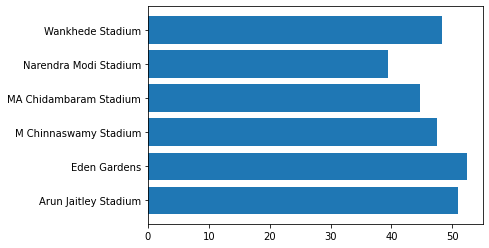

In [490]:
#Venue

relevant_venues = ['Eden Gardens','M Chinnaswamy Stadium','MA Chidambaram Stadium','Narendra Modi Stadium',
                   'Arun Jaitley Stadium','Wankhede Stadium']

data_df_relevant_venues = data_df_processed[data_df_processed.venue.isin(relevant_venues)]
data_df_processed = data_df_relevant_venues.infer_objects() #converting the object data types to relevant data types

venue_avg = data_df_processed.groupby(['venue']).runs.mean()
plt.barh(venue_avg.index,venue_avg.values)


<BarContainer object of 4 artists>

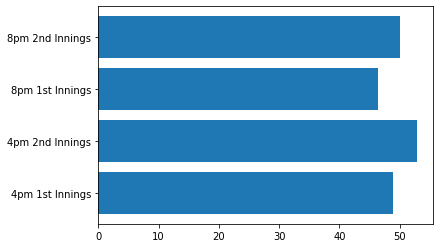

In [491]:
#Afternoon vs Night Matches 

afternoon_matches_PP = data_df_processed[data_df_processed['D/N']==4]
night_matches_PP = data_df_processed[data_df_processed['D/N']==8]

noon1 = afternoon_matches_PP[afternoon_matches_PP.innings==1].runs.mean()
noon2 = afternoon_matches_PP[afternoon_matches_PP.innings==2].runs.mean()
night1 = night_matches_PP[night_matches_PP.innings==1].runs.mean()
night2 =night_matches_PP[night_matches_PP.innings==2].runs.mean()

labels = ['4pm 1st Innings','4pm 2nd Innings','8pm 1st Innings','8pm 2nd Innings']
plt.barh(labels,[noon1,noon2,night1,night2])

Text(0, 0.5, 'Powerplay Runs')

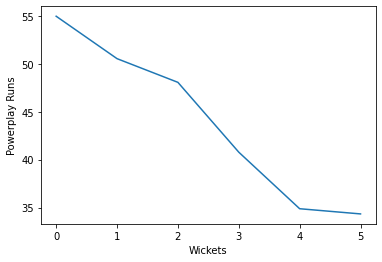

In [492]:
#Wickets

wickets_avg = data_df_processed.groupby(['wickets']).runs.mean()
plt.plot(wickets_avg.index[:6],wickets_avg[:6]) #the 7th wicket score is an outlier
plt.xlabel('Wickets')
plt.ylabel('Powerplay Runs')

Text(0, 0.5, 'Powerplay Runs')

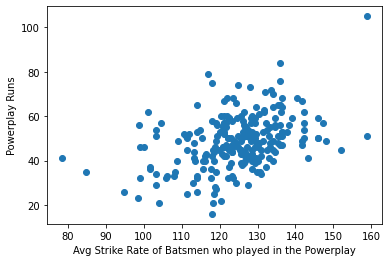

In [493]:
#Avg Strike Rate

plt.scatter(data_df_processed.avg_strike_rate,data_df_processed.runs)
plt.xlabel('Avg Strike Rate of Batsmen who played in the Powerplay')
plt.ylabel('Powerplay Runs')

Text(0, 0.5, 'Powerplay Runs')

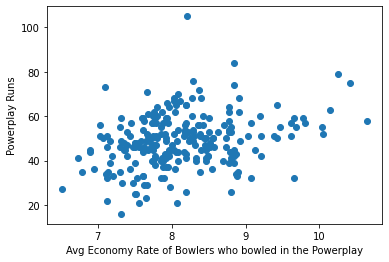

In [494]:
#Avg Economy Rate

plt.scatter(data_df_processed.avg_economy_rate,data_df_processed.runs)
plt.xlabel('Avg Economy Rate of Bowlers who bowled in the Powerplay')
plt.ylabel('Powerplay Runs')

Text(0.5, 0, 'Runs Scored')

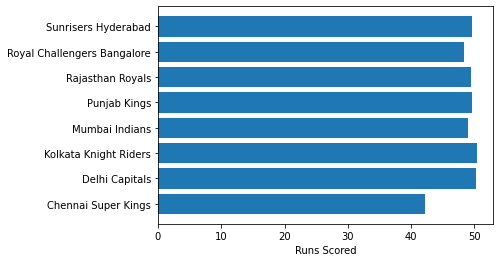

In [546]:
#Batting Team

relevant_teams = ['Chennai Super Kings','Delhi Capitals','Kolkata Knight Riders','Mumbai Indians',
                  'Punjab Kings','Rajasthan Royals','Royal Challengers Bangalore','Sunrisers Hyderabad']

data_df_relevant_teams = data_df_processed[data_df_processed.batting_team.isin(relevant_teams)]
batting_team_avg = data_df_relevant_teams.groupby(['batting_team']).runs.mean()

labels = batting_team_avg.index
runs = batting_team_avg.values

plt.barh(labels,runs)
plt.xlabel('Runs Scored')

Text(0.5, 0, 'Runs Conceded')

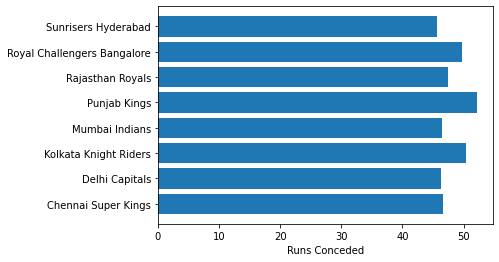

In [547]:
#Bowling Team

data_df_bowling_teams = data_df_processed[data_df_processed.bowling_team.isin(relevant_teams)]
bowling_team_avg = data_df_bowling_teams.groupby(['bowling_team']).runs.mean()

labels = bowling_team_avg.index
runs = bowling_team_avg.values

plt.barh(labels,runs)
plt.xlabel('Runs Conceded')

# Preparing the Data for the Model

In [497]:
#data_df_processed = pd.read_csv('data_df_processed.csv')
data_df_processed

,match_id,season,venue,date,D/N,innings,batting_team,bowling_team,batsmen,bowlers,avg_strike_rate,avg_economy_rate,wickets,runs
6,1082595,2017,M Chinnaswamy Stadium,2017-04-08,4.0,1,Royal Challengers Bangalore,Delhi Daredevils,"[CH Gayle, SR Watson, Mandeep Singh, KM Jadhav]","[Z Khan, CH Morris, PJ Cummins, S Nadeem]",113.14,8.47,2,41
7,1082595,2017,M Chinnaswamy Stadium,2017-04-08,4.0,2,Delhi Daredevils,Royal Challengers Bangalore,"[AP Tare, SW Billings, KK Nair, SV Samson]","[B Stanlake, YS Chahal, Iqbal Abdulla, TS Mills]",116.38,8.19,2,43
12,1082597,2017,Wankhede Stadium,2017-04-09,8.0,1,Kolkata Knight Riders,Mumbai Indians,"[G Gambhir, CA Lynn, RV Uthappa, MK Pandey]","[SL Malinga, MJ McClenaghan, JJ Bumrah, KH Pan...",122.50,7.31,2,59
13,1082597,2017,Wankhede Stadium,2017-04-09,8.0,2,Mumbai Indians,Kolkata Knight Riders,"[PA Patel, JC Buttler]","[TA Boult, CR Woakes, SP Narine, Kuldeep Yadav]",147.95,7.69,0,49
18,1082600,2017,Wankhede Stadium,2017-04-12,8.0,1,Sunrisers Hyderabad,Mumbai Indians,"[S Dhawan, DA Warner]","[Harbhajan Singh, SL Malinga, JJ Bumrah]",130.99,7.11,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1254076,2021,Wankhede Stadium,2021-04-25,4.0,2,Royal Challengers Bangalore,Chennai Super Kings,"[V Kohli, D Padikkal, Washington Sundar, GJ Ma...","[DL Chahar, SM Curran, SN Thakur]",114.05,8.19,2,65
396,1254077,2021,MA Chidambaram Stadium,2021-04-25,8.0,1,Delhi Capitals,Sunrisers Hyderabad,"[PP Shaw, S Dhawan]","[KK Ahmed, Abhishek Sharma, S Kaul, J Suchith]",135.47,7.03,0,51
397,1254077,2021,MA Chidambaram Stadium,2021-04-25,8.0,2,Sunrisers Hyderabad,Delhi Capitals,"[DA Warner, JM Bairstow, KS Williamson, Virat ...","[K Rabada, R Ashwin, MP Stoinis, AR Patel, Ave...",98.86,8.71,2,56
398,1254078,2021,Narendra Modi Stadium,2021-04-26,8.0,1,Punjab Kings,Kolkata Knight Riders,"[KL Rahul, MA Agarwal]","[Shivam Mavi, PJ Cummins, SP Narine]",122.48,7.93,1,37


In [498]:
#label encoding the venue and teams
#RUN THIS BLOCK OF CODE ONLY ONCE
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

data_df_final = data_df_processed.copy()
venue_encoder = LabelEncoder()
team_encoder = LabelEncoder()

data_df_final['venue'] = venue_encoder.fit_transform(data_df_final.venue)

team = team_encoder.fit(data_df_final.batting_team)
data_df_final['batting_team'] = team.transform(data_df_final.batting_team)
data_df_final['bowling_team'] = team.transform(data_df_final.bowling_team)

data_df_final.head()

,match_id,season,venue,date,D/N,innings,batting_team,bowling_team,batsmen,bowlers,avg_strike_rate,avg_economy_rate,wickets,runs
6,1082595,2017,2,2017-04-08,4.0,1,9,2,"[CH Gayle, SR Watson, Mandeep Singh, KM Jadhav]","[Z Khan, CH Morris, PJ Cummins, S Nadeem]",113.14,8.47,2,41
7,1082595,2017,2,2017-04-08,4.0,2,2,9,"[AP Tare, SW Billings, KK Nair, SV Samson]","[B Stanlake, YS Chahal, Iqbal Abdulla, TS Mills]",116.38,8.19,2,43
12,1082597,2017,5,2017-04-09,8.0,1,4,5,"[G Gambhir, CA Lynn, RV Uthappa, MK Pandey]","[SL Malinga, MJ McClenaghan, JJ Bumrah, KH Pan...",122.50,7.31,2,59
13,1082597,2017,5,2017-04-09,8.0,2,5,4,"[PA Patel, JC Buttler]","[TA Boult, CR Woakes, SP Narine, Kuldeep Yadav]",147.95,7.69,0,49
18,1082600,2017,5,2017-04-12,8.0,1,10,5,"[S Dhawan, DA Warner]","[Harbhajan Singh, SL Malinga, JJ Bumrah]",130.99,7.11,0,34


In [515]:
chosen_features = ['avg_strike_rate','avg_economy_rate','wickets']

#converting the dataframe into a numpy array
X = data_df_final[chosen_features].values
y = data_df_final.runs.values

#making the data type compatible for model training
X=X.astype(np.float32)
y=y.astype(np.float32)

print(X.shape)
print(y.shape)

(240, 3)
(240,)


In [532]:
#scaling the data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Model Training

In [501]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [533]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y)
X_train.shape

(180, 3)

In [517]:
#Accuracy metric functions

def custom_accuracy_metric(y_true,y_pred,threshhold = 3):
    true_mat = y_pred[np.abs(y_true-y_pred)<=threshhold]
    return len(true_mat)/len(y_pred)

def analyse_model(model,X_train,X_test,y_train,y_test,threshhold=3):
    
    y_pred_train = np.array(list(map(int,model.predict(X_train))))
    y_pred_test = np.array(list(map(int,model.predict(X_test))))
    
    print('R2 Score for training set:',round(r2_score(y_train,y_pred_train),3))
    print('R2 Score for test set:',round(r2_score(y_test,y_pred_test),3))
    print()
    
    #using custom accuracy metric
    print('Accuracy for a threshhold of {} runs'.format(threshhold))
    print('Training set: ',round(custom_accuracy_metric(y_train,y_pred_train,threshhold)*100,2),'%')
    print('Test set: ',round(custom_accuracy_metric(y_test,y_pred_test,threshhold)*100,2),'%')

Linear Regression Model

In [534]:
#lr stands for linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)

print('**** Linear Regression ****')
analyse_model(lr,X_train,X_test,y_train,y_test,5)

**** Linear Regression ****
R2 Score for training set: 0.292
R2 Score for test set: 0.262

Accuracy for a threshhold of 5 runs
Training set:  42.78 %
Test set:  50.0 %


In [535]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

print('**** Decision Tree Regressor ****')
analyse_model(tree,X_train,X_test,y_train,y_test,5)

**** Decision Tree Regressor ****
R2 Score for training set: 1.0
R2 Score for test set: -0.371

Accuracy for a threshhold of 5 runs
Training set:  100.0 %
Test set:  33.33 %


In [536]:
br = BayesianRidge()
br.fit(X_train,y_train)

print('**** Bayesian Ridge ****')
analyse_model(br,X_train,X_test,y_train,y_test,5)

**** Bayesian Ridge ****
R2 Score for training set: 0.297
R2 Score for test set: 0.258

Accuracy for a threshhold of 5 runs
Training set:  43.33 %
Test set:  48.33 %


# Neural Network Model

In [511]:
from tensorflow import keras
from tensorflow.keras.layers import Dense

In [543]:
DL_model = keras.Sequential()

DL_model.add(Dense(64,input_dim=3, activation= "relu"))
DL_model.add(Dense(64, activation= "relu"))


DL_model.add(Dense(1,activation = 'linear'))

DL_model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 64)                256       
_________________________________________________________________
dense_175 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_176 (Dense)            (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


In [544]:
DL_model.compile(loss= "mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

DL_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 2552.3721 - mean_squared_error: 2552.3721
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 2640.3860 - mean_squared_error: 2640.3860
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 2526.0831 - mean_squared_error: 2526.0831
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 2436.5310 - mean_squared_error: 2436.5310
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 2545.3777 - mean_squared_error: 2545.3777
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 2468.7806 - mean_squared_error: 2468.7806
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 2394.0243 - mean_squared_error: 2394.0243
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 2306.4727 - mean_squared_error: 2306.4727
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 2264.4229 - mean_squared_

6/6 [==============================] - 0s 3ms/step - loss: 133.2594 - mean_squared_error: 133.2594
Epoch 74/100
6/6 [==============================] - 0s 4ms/step - loss: 122.5040 - mean_squared_error: 122.5040
Epoch 75/100
6/6 [==============================] - 0s 4ms/step - loss: 126.3061 - mean_squared_error: 126.3061
Epoch 76/100
6/6 [==============================] - 0s 4ms/step - loss: 132.9286 - mean_squared_error: 132.9286
Epoch 77/100
6/6 [==============================] - 0s 5ms/step - loss: 105.9278 - mean_squared_error: 105.9278
Epoch 78/100
6/6 [==============================] - 0s 3ms/step - loss: 119.1518 - mean_squared_error: 119.1518
Epoch 79/100
6/6 [==============================] - 0s 3ms/step - loss: 111.1641 - mean_squared_error: 111.1641
Epoch 80/100
6/6 [==============================] - 0s 3ms/step - loss: 117.1784 - mean_squared_error: 117.1784
Epoch 81/100
6/6 [==============================] - ETA: 0s - loss: 107.9156 - mean_squared_error: 107.91 - 0s 2ms/st

In [545]:
print('**** Neural Network with 1 hidden layer ****')
analyse_model(DL_model,X_train,X_test,y_train,y_test,threshhold=5)

**** Neural Network with 1 hidden layer ****
R2 Score for training set: 0.254
R2 Score for test set: 0.33

Accuracy for a threshhold of 5 runs
Training set:  39.44 %
Test set:  45.0 %


# Saving the Models

In [49]:
import joblib

In [64]:
joblib.dump(venue_encoder,'venue_encoder.joblib')
joblib.dump(team_encoder,'team_encoder.joblib')
joblib.dump(scaler,'scaler.joblib')
#DL_model.save('DL_model.h5')
joblib.dump(lr,'linear_regression.joblib')

['linear_regression.joblib']

In [65]:
joblib.dump(br,'bayesian_ridge_regression.joblib')

['bayesian_ridge_regression.joblib']